In [64]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV,ParameterGrid,cross_val_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

In [65]:
x_train = pd.read_csv('data_source/X_train.csv')
y_train = pd.read_csv('data_source/y_train.csv')

x_test = pd.read_csv('data_source/X_test.csv')
y_test = pd.read_csv('data_source/y_test.csv')

x_train_std = x_train.copy()
y_train_std = y_train.copy()

x_train_robust = x_train.copy()
y_train_robust = y_train.copy()

x_test_std = x_test.copy()
y_test_std = y_test.copy()

x_test_robust = x_test.copy()
y_test_robust = y_test.copy()

x_train_std = x_train_std.loc[:,['Destination Port', 'NAT Source Port','Packets', 'Elapsed Time (sec)','Bytes Received']]
y_train_std = y_train_std.loc[:,'Action']
x_test_std = x_test_std.loc[:,['Destination Port', 'NAT Source Port','Packets', 'Elapsed Time (sec)','Bytes Received']]
y_test_std = y_test_std.loc[:,'Action']

x_train_robust = x_train_robust.loc[:,['Destination Port', 'NAT Source Port','Packets', 'Elapsed Time (sec)','Bytes Received']]
y_train_robust = y_train_robust.loc[:,'Action']
x_test_robust = x_test_robust.loc[:,['Destination Port', 'NAT Source Port','Packets', 'Elapsed Time (sec)','Bytes Received']]
y_test_robust = y_test_robust.loc[:,'Action']

In [66]:
scaler = StandardScaler()
robust = RobustScaler()
x_train_std.loc[:,['Packets','Elapsed Time (sec)','Bytes Received']] = scaler.fit_transform(x_train_std.loc[:,['Packets','Elapsed Time (sec)','Bytes Received']])
x_test_std.loc[:,['Packets','Elapsed Time (sec)','Bytes Received']] = scaler.fit_transform(x_test_std.loc[:,['Packets','Elapsed Time (sec)','Bytes Received']])

x_train_robust.loc[:,['Packets','Elapsed Time (sec)','Bytes Received']] = robust.fit_transform(x_train_robust.loc[:,['Packets','Elapsed Time (sec)','Bytes Received']])
x_test_robust.loc[:,['Packets','Elapsed Time (sec)','Bytes Received']] = robust.fit_transform(x_test_robust.loc[:,['Packets','Elapsed Time (sec)','Bytes Received']])

y_train_std.replace({'allow':0, 'deny':1, 'drop':2, 'reset-both':3},inplace=True)
y_test_std.replace({'allow':0, 'deny':1, 'drop':2, 'reset-both':3},inplace=True)

y_train_robust.replace({'allow':0, 'deny':1, 'drop':2, 'reset-both':3},inplace=True)
y_test_robust.replace({'allow':0, 'deny':1, 'drop':2, 'reset-both':3},inplace=True)

In [49]:
clf = XGBClassifier(object='multi:softmax',num_class=4,seed=42)
clf.fit(x_train_std,y_train_std)
answer = clf.predict(x_test_std)
print(classification_report(y_test_std, answer))

[20:13:03] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "object" } are not used.

              precision    recall  f1-score   support

           0       1.00      0.88      0.94     11292
           1       0.95      0.92      0.94      4496
           2       1.00      1.00      1.00      3856
           3       0.01      0.94      0.02        16

    accuracy                           0.92     19660
   macro avg       0.74      0.94      0.72     19660
weighted avg       0.99      0.92      0.95     19660



In [50]:
parameters = {'object':['multi:softmax','multi:softprob'],
              'eval_metric':['merror','mlogloss']
}

# clf_best = GridSearchCV(clf, parameters, cv=5)
# clf_best.fit(x_train_byte,y_train_byte)
# print(clf_best.best_params_)
# print(clf_best.best_estimator_)
# answer = clf_best.predict(x_test_byte)
# print(classification_report(y_test_byte, answer))

In [51]:
clf = XGBClassifier(object='multi:softmax',num_class=4,seed=42,eval_metric=['merror','mlogloss'])
clf.fit(x_train_std,y_train_std,eval_set=[(x_train_std, y_train_std), (x_test_std, y_test_std)])

# train_yhat = clf.predict(x_train_byte)
# train_f1 = f1_score(y_train_byte,train_yhat,average='weighted')

# test_yhat = clf.predict(x_test_byte)
# test_f1 = f1_score(y_test_byte,test_yhat,average='weighted')
# print('Train Score\n',classification_report(y_train_byte,train_yhat))
# print('Test Score\n',classification_report(y_test_byte, test_yhat))
# print(f"AVG F1-Score Train: {train_f1}\nAVG F1-Score Test: {test_f1}")

[20:13:07] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "object" } are not used.

[0]	validation_0-merror:0.09549	validation_0-mlogloss:0.94092	validation_1-merror:0.14837	validation_1-mlogloss:0.96716
[1]	validation_0-merror:0.08448	validation_0-mlogloss:0.70481	validation_1-merror:0.16867	validation_1-mlogloss:0.75017
[2]	validation_0-merror:0.08498	validation_0-mlogloss:0.55477	validation_1-merror:0.16867	validation_1-mlogloss:0.61387
[3]	validation_0-merror:0.08717	validation_0-mlogloss:0.45370	validation_1-merror:0.16490	validation_1-mlogloss:0.52535
[4]	validation_0-merror:0.07776	validation_0-mlogloss:0.38209	validation_1-merror:0.15509	validation_1-mlogloss:0.46554
[5]	validation_0-merror:0.07506	validation_0-mlogloss:0.33033	validation_1-merror:0.15244	validation_1-mlogloss:0.42499
[6]	validation_0-merror:0.07504	validation_0-mlogloss:0.29375	validation_1-merror:0.14268	validation_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=['merror', 'mlogloss'],
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_class=4, num_parallel_tree=None, object='multi:softmax', ...)

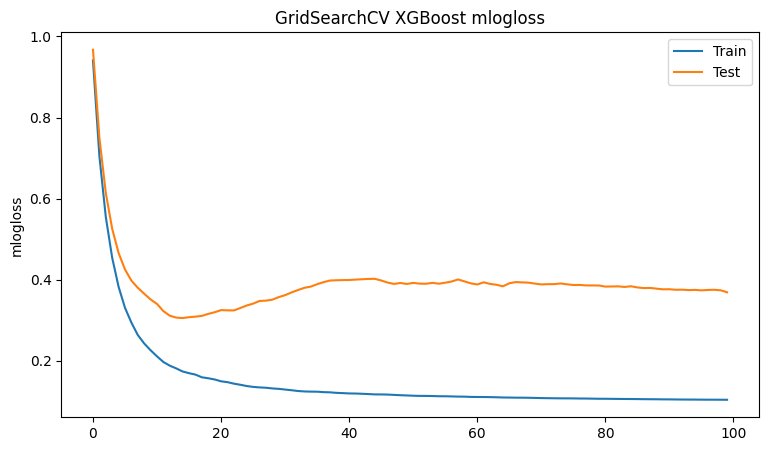

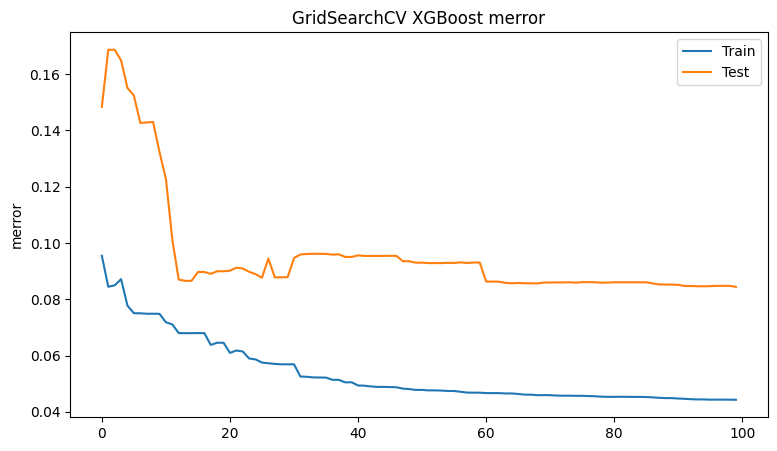

In [52]:
results = clf.evals_result()
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)

fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
plt.ylabel('mlogloss')
plt.title('GridSearchCV XGBoost mlogloss')
plt.show()

fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
plt.ylabel('merror')
plt.title('GridSearchCV XGBoost merror')
plt.show()

In [53]:
## ---------- Model Classification Report ----------
## get predictions and create model quality report

y_pred = clf.predict(x_test_std)

print('\n------------------ Confusion Matrix -----------------\n')
print(confusion_matrix(y_test_std, y_pred))

print('\nAccuracy: {:.2f}'.format(accuracy_score(y_test_std, y_pred)))
print('Balanced Accuracy: {:.2f}\n'.format(balanced_accuracy_score(y_test_std, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test_std, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test_std, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test_std, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test_std, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test_std, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test_std, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test_std, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test_std, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test_std, y_pred, average='weighted')))

print('\n--------------- Classification Report ---------------\n')
print(classification_report(y_test_std, y_pred))
print('---------------------- XGBoost ----------------------') # unnecessary fancy styling


------------------ Confusion Matrix -----------------

[[9982  213    0 1097]
 [   2 4147   11  336]
 [   0    0 3856    0]
 [   0    1    0   15]]

Accuracy: 0.92
Balanced Accuracy: 0.94

Micro Precision: 0.92
Micro Recall: 0.92
Micro F1-score: 0.92

Macro Precision: 0.74
Macro Recall: 0.94
Macro F1-score: 0.72

Weighted Precision: 0.99
Weighted Recall: 0.92
Weighted F1-score: 0.95

--------------- Classification Report ---------------

              precision    recall  f1-score   support

           0       1.00      0.88      0.94     11292
           1       0.95      0.92      0.94      4496
           2       1.00      1.00      1.00      3856
           3       0.01      0.94      0.02        16

    accuracy                           0.92     19660
   macro avg       0.74      0.94      0.72     19660
weighted avg       0.99      0.92      0.95     19660

---------------------- XGBoost ----------------------


In [54]:
best_score = 0
best_grid = ''
for g in ParameterGrid(parameters):
    clf.set_params(**g)
    clf.fit(x_train_robust,y_train_robust)
    answer = clf.predict(x_test_robust)
    f1 = f1_score(y_test_robust,answer,average='weighted')

    if f1 > best_score:
        best_score = f1
        best_grid = g


[20:13:11] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "object" } are not used.

[20:13:14] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "object" } are not used.

[20:13:18] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "object" } are not used.

[20:13:22] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "object" } are not used.



In [55]:
print("F1: %0.5f" % best_score)
print("Grid:", best_grid)

F1: 0.92369
Grid: {'eval_metric': 'merror', 'object': 'multi:softmax'}


In [58]:
clf = XGBClassifier(object='multi:softmax',num_class=4,eval_metric='merror')
clf.fit(x_train_robust,y_train_robust)

train_yhat = clf.predict(x_train_robust)
train_f1 = f1_score(y_train_robust,train_yhat,average='macro')

test_yhat = clf.predict(x_test_robust)
test_f1 = f1_score(y_test_robust,test_yhat,average='macro')
print('Train Score\n',classification_report(y_train_robust,train_yhat))
print('Test Score\n',classification_report(y_test_robust, test_yhat))
print(f"AVG F1-Score Train: {train_f1}\nAVG F1-Score Test: {test_f1}")

[20:14:10] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "object" } are not used.

Train Score
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     25830
           1       0.92      0.89      0.91     25165
           2       1.00      1.00      1.00     26245
           3       0.90      0.93      0.91     25744

    accuracy                           0.96    102984
   macro avg       0.96      0.96      0.96    102984
weighted avg       0.96      0.96      0.96    102984

Test Score
               precision    recall  f1-score   support

           0       1.00      0.81      0.90     11292
           1       0.94      0.92      0.93      4496
           2       1.00      1.00      1.00      3856
           3       0.01      0.94      0.01        16

    accuracy                           0.87     19660
   macro avg       0.74      0.92  

### Grid Search for std

In [59]:
clf_best = GridSearchCV(clf, parameters, cv=5)
clf_best.fit(x_train_std,y_train_std)
print(clf_best.best_params_)
print(clf_best.best_estimator_)
answer = clf_best.predict(x_test_std)
print(classification_report(y_test_std, answer))

[20:15:15] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "object" } are not used.

[20:15:18] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "object" } are not used.

[20:15:22] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "object" } are not used.

[20:15:25] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "object" } are not used.

[20:15:28] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "object" } are not used.

[20:15:31] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpytho

In [60]:
clf = XGBClassifier(object='multi:softmax',num_class=4,eval_metric='merror')
clf.fit(x_train_std,y_train_std)

train_yhat = clf.predict(x_train_std)
train_f1 = f1_score(y_train_std,train_yhat,average='macro')

test_yhat = clf.predict(x_test_std)
test_f1 = f1_score(y_test_std,test_yhat,average='macro')
print('Train Score\n',classification_report(y_train_std,train_yhat))
print('Test Score\n',classification_report(y_test_std, test_yhat))
print(f"AVG F1-Score Train: {train_f1}\nAVG F1-Score Test: {test_f1}")

[20:16:28] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "object" } are not used.

Train Score
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     25830
           1       0.92      0.89      0.91     25165
           2       1.00      1.00      1.00     26245
           3       0.90      0.93      0.91     25744

    accuracy                           0.96    102984
   macro avg       0.96      0.96      0.96    102984
weighted avg       0.96      0.96      0.96    102984

Test Score
               precision    recall  f1-score   support

           0       1.00      0.88      0.94     11292
           1       0.95      0.92      0.94      4496
           2       1.00      1.00      1.00      3856
           3       0.01      0.94      0.02        16

    accuracy                           0.92     19660
   macro avg       0.74      0.94  

### Grid Search CV for Robust

In [61]:
clf_best = GridSearchCV(clf, parameters, cv=5)
clf_best.fit(x_train_robust,y_train_robust)
print(clf_best.best_params_)
print(clf_best.best_estimator_)
answer = clf_best.predict(x_test_robust)
print(classification_report(y_test_robust, answer))

[20:16:49] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "object" } are not used.

[20:16:52] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "object" } are not used.

[20:16:55] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "object" } are not used.

[20:16:59] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "object" } are not used.

[20:17:02] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "object" } are not used.

[20:17:04] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpytho

In [63]:
clf = XGBClassifier(object='multi:softmax',num_class=4,eval_metric='merror')
clf.fit(x_train_robust,y_train_robust)

train_yhat = clf.predict(x_train_robust)
train_f1 = f1_score(y_train_robust,train_yhat,average='macro')

test_yhat = clf.predict(x_test_robust)
test_f1 = f1_score(y_test_robust,test_yhat,average='macro')
print('Train Score\n',classification_report(y_train_robust,train_yhat))
print('Test Score\n',classification_report(y_test_robust, test_yhat))
print(f"AVG F1-Score Train: {train_f1}\nAVG F1-Score Test: {test_f1}")

[20:18:38] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "object" } are not used.

Train Score
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     25830
           1       0.92      0.89      0.91     25165
           2       1.00      1.00      1.00     26245
           3       0.90      0.93      0.91     25744

    accuracy                           0.96    102984
   macro avg       0.96      0.96      0.96    102984
weighted avg       0.96      0.96      0.96    102984

Test Score
               precision    recall  f1-score   support

           0       1.00      0.81      0.90     11292
           1       0.94      0.92      0.93      4496
           2       1.00      1.00      1.00      3856
           3       0.01      0.94      0.01        16

    accuracy                           0.87     19660
   macro avg       0.74      0.92  

In [69]:
cross_std = cross_val_score(XGBClassifier(object='multi:softmax',num_class=4,eval_metric='merror'),x_train_std,y_train_std,cv=5)
print(round(np.mean(cross_std),4))

[20:44:38] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "object" } are not used.

[20:44:42] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "object" } are not used.

[20:44:45] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "object" } are not used.

[20:44:48] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "object" } are not used.

[20:44:52] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "object" } are not used.

0.9499


In [70]:
cross_std = cross_val_score(XGBClassifier(object='multi:softmax',num_class=4,eval_metric='merror'),x_train_robust,y_train_robust,cv=5)
print(round(np.mean(cross_std),4))

[20:44:55] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "object" } are not used.

[20:44:58] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "object" } are not used.

[20:45:01] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "object" } are not used.

[20:45:04] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "object" } are not used.

[20:45:07] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "object" } are not used.

0.9499
